In [147]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import time

In [204]:
years = np.arange(1980, 2010)
for year in years :
    url = f'https://fbref.com/en/comps/9/{year-1}-{year}/schedule/'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    table = soup.find('table')
    games = pd.read_html(str(table))[0]
    games = games[games['Wk'].notna()]
    games = games[['Date', 'Home', 'Away', 'Score']]
    games['Goals_home'] = games['Score'].apply(lambda x: str(x).split('–')[0]).astype(int)
    games['Goals_away'] = games['Score'].apply(lambda x: str(x).split('–')[-1]).astype(int)
    games['HomeWin'] = (games['Goals_home'] > games['Goals_away']).astype(int)
    games['Draw'] = (games['Goals_home'] == games['Goals_away']).astype(int)
    games['AwayWin'] = (games['Goals_home'] < games['Goals_away']).astype(int)
    games['Date'] = pd.to_datetime(games['Date'])
    games = games[['Date', 'Home', 'Away', 'Score', 'HomeWin', 'Draw','AwayWin']]
    games.to_csv(f'games/{year}.csv', index = None)
    time.sleep(3)

In [205]:
R0 = 1500
K = 32

In [206]:
years = np.arange(1980, 2024)
elo = {}
history = {}
for year in years :

    games = pd.read_csv(f'games/{year}.csv')
    games['Date'] = pd.to_datetime(games['Date'])
    teams = games['Home'].unique().tolist()

    for tm in teams :
        if tm not in elo.keys() :
            elo[tm] = R0
            history[tm] = []

    for _, game in games.iterrows():
    
        # Fetch team ratings
        Ra = elo.get(game['Home'])
        Rb = elo.get(game['Away'])
        # Compute expected outcome of game
        Ea = 1 / (1 + 10 ** ((Rb - Ra) / 400))
        Eb = 1 / (1 + 10 ** ((Ra - Rb) / 400))

        # Fetch actual result
        Sa = game['HomeWin'] + 0.5 * game['Draw']
        Sb = 1 - Sa
        
        # Update team ratings
        Ra_ = Ra + K * (Sa - Ea)
        Rb_ = Rb + K * (Sb - Eb)
        elo[game['Home']] = Ra_
        elo[game['Away']] = Rb_

        # Update rating history
        Ha = history.get(game['Home'])
        Ha.append((game['Date'], Ra_))
        history[game['Home']] = Ha
        Hb = history.get(game['Away'])
        Hb.append((game['Date'], Rb_))
        history[game['Away']] = Hb

In [226]:
from datetime import datetime

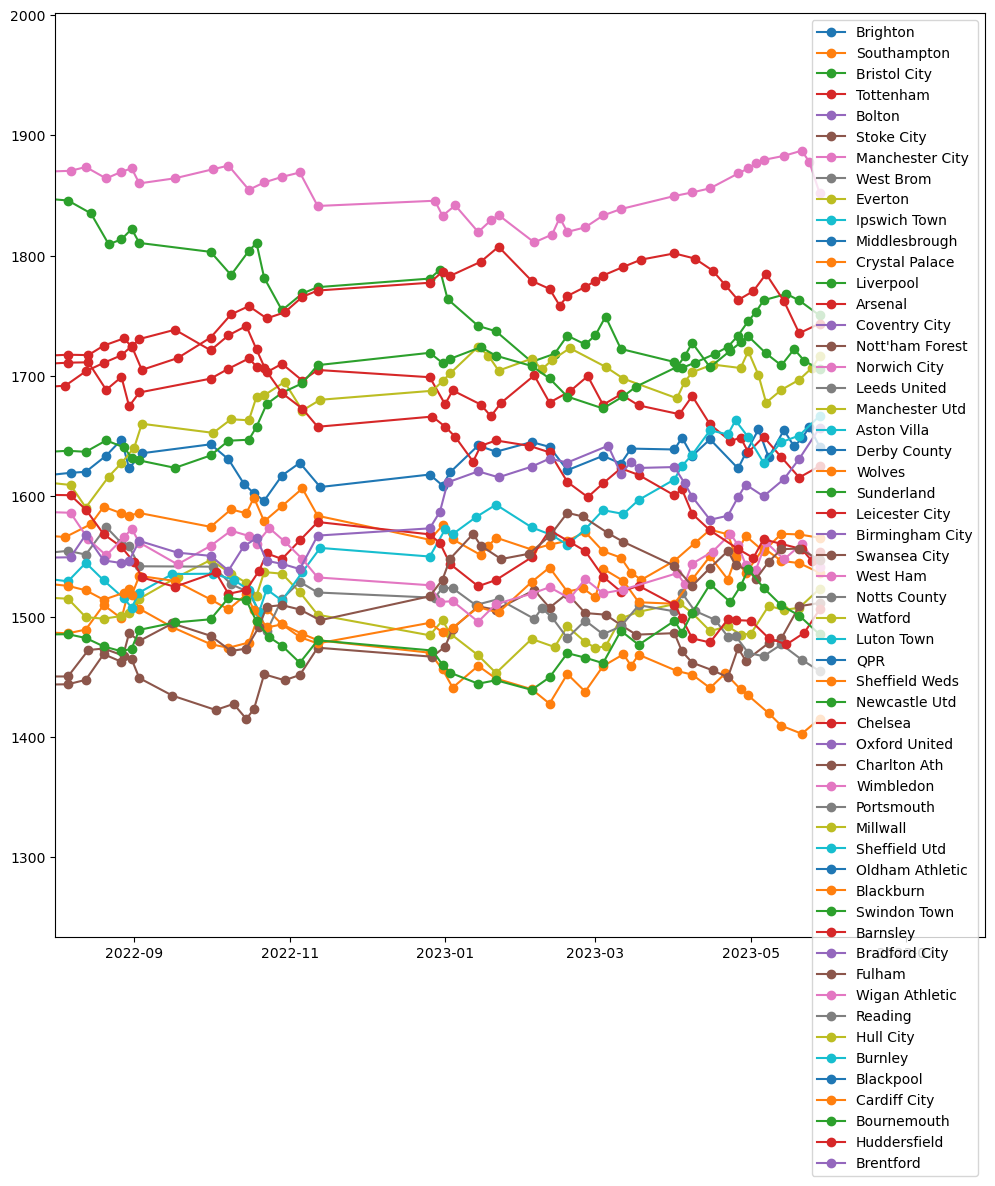

In [230]:
plt.figure(figsize = (12, 12))
for tm in elo.keys() :
    t, r = list(zip(*history.get(tm)))
    plt.plot(t, r, '-o', label = tm)

plt.xlim([datetime(2022, 8, 1), datetime(2023, 8, 1)])
plt.legend()

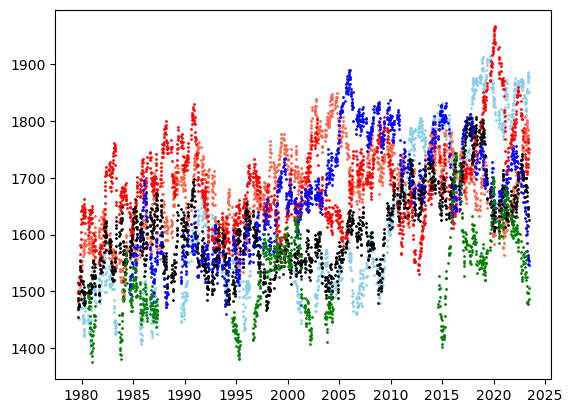

In [222]:
t, r = list(zip(*history.get('Manchester City')))
plt.scatter(t, r, s = 1, c = 'skyblue')
t, r = list(zip(*history.get('Arsenal')))
plt.scatter(t, r, s = 1, c = 'tomato')
t, r = list(zip(*history.get('Liverpool')))
plt.scatter(t, r, s = 1, c = 'red')
t, r = list(zip(*history.get('Chelsea')))
plt.scatter(t, r, s = 1, c = 'blue')
t, r = list(zip(*history.get('Tottenham')))
plt.scatter(t, r, s = 1, c = 'k')
t, r = list(zip(*history.get('Leicester City')))
plt.scatter(t, r, s = 1, c = 'green')

In [225]:
elo

{'Brighton': 1641.3640126375878,
 'Southampton': 1415.198417527446,
 'Bristol City': 1410.9680926011088,
 'Tottenham': 1625.129992926581,
 'Bolton': 1485.0971825289716,
 'Stoke City': 1486.4842991967612,
 'Manchester City': 1851.97503690903,
 'West Brom': 1442.0302905871315,
 'Everton': 1523.2055072989046,
 'Ipswich Town': 1509.6497690727638,
 'Middlesbrough': 1417.8334750127276,
 'Crystal Palace': 1565.6446458250834,
 'Liverpool': 1750.3820304826982,
 'Arsenal': 1743.58368638496,
 'Coventry City': 1471.8215545465664,
 "Nott'ham Forest": 1511.4462946183037,
 'Norwich City': 1360.1938343831703,
 'Leeds United': 1454.8326359852726,
 'Manchester Utd': 1716.2832195841204,
 'Aston Villa': 1666.8743674200205,
 'Derby County': 1287.314912919627,
 'Wolves': 1536.562964023246,
 'Sunderland': 1409.9480413474284,
 'Leicester City': 1506.038546094266,
 'Birmingham City': 1489.5417461313507,
 'Swansea City': 1471.1056143895482,
 'West Ham': 1541.1237757342733,
 'Notts County': 1462.574514786927,
 '